# Import Libraries

In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Data

In [526]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

# Train and Test Data

In [527]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [528]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preprocessing

# Train_Data

In [529]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [530]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Number of Missing value in Columns

In [531]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

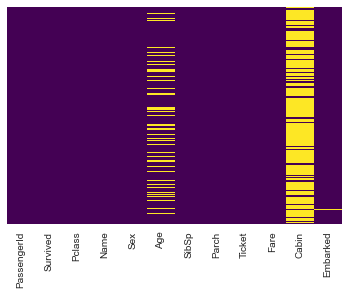

In [532]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

The "Age" and "Cabin" columns has more missing values.

# Filling  the Missing value of the Age.

In [533]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data["Age"].isnull().sum()

0

<AxesSubplot:>

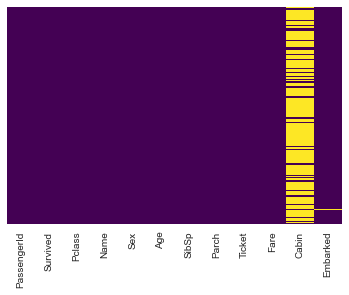

In [534]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

# Filling  the Missing value of the Embarked.

In [535]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Embarked'].fillna('Missing', inplace=True)


In [536]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Remove Column

.Remove cabin column has a lot of missing value in train and test.

In [537]:
train_data.drop("Cabin",axis=1,inplace=True)

<AxesSubplot:>

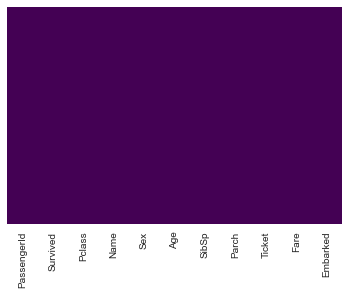

In [538]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

# Converting categorical variables into a numerical format 

In [539]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [540]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])

In [541]:
df_encoded = pd.get_dummies(train_data['Embarked'])

# We can remove the Name and Ticket column as they cannot contribute to Survival column.

In [542]:
train_data.drop(['Name','Embarked','Ticket'],axis=1,inplace=True)

In [543]:
train_data=pd.concat([train_data,df_encoded],axis=1)

In [544]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


In [545]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
C              0
Q              0
S              0
dtype: int64

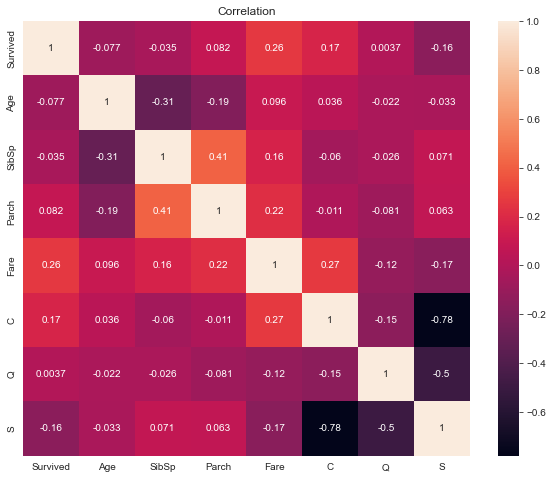

In [546]:
plt.figure(figsize=(10,8))
sns.heatmap(data=data.select_dtypes(include='number').corr(),annot=True)
plt.title('Correlation')
plt.show()

# Test_Data

In [547]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [548]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Fill the Missing value of age.

In [549]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data["Age"].isnull().sum()

0

# Remove the Columns
.Cabin columns lot of null value

In [550]:
test_data.drop("Cabin",axis=1,inplace=True)

In [551]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

Used the fillna() method to fill the require Fare row.

In [552]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
test_data["Fare"].isnull().sum()

0

In [553]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Convert the categorical Variable into Numerical Variable.

In [554]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])

In [555]:
df_encoded = pd.get_dummies(test_data['Embarked'])

# We can remove the Name and Ticket column as they cannot contribute to Survival column.

In [556]:
test_data.drop(['Name','Embarked','Ticket'],axis=1,inplace=True)


In [557]:
test_data=pd.concat([test_data,df_encoded],axis=1)

In [558]:
test_data.drop(['PassengerId','Pclass'],axis=1,inplace=True)

In [559]:
test_data.head()

,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,34.5,0,0,7.8292,0,1,0
1,0,47.0,1,0,7.0000,0,0,1
2,1,62.0,0,0,9.6875,0,1,0
3,1,27.0,0,0,8.6625,0,0,1
4,0,22.0,1,1,12.2875,0,0,1


# Analysis of Survived & Passengerclass. 

In [560]:
train_count_Survived = train_data.Survived.value_counts().reset_index()
train_count_Survived 

,index,Survived
0,0,549
1,1,342


<AxesSubplot:xlabel='Survived', ylabel='count'>

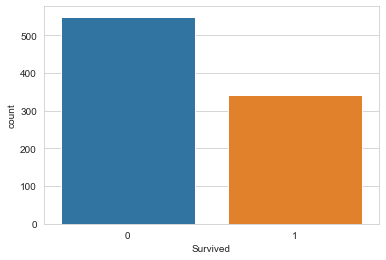

In [561]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=train_data)

<Figure size 720x432 with 0 Axes>

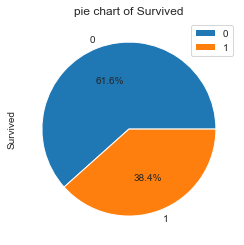

In [562]:
plt.figure(figsize=(10, 6))
train_count_Survived.plot.pie(y='Survived',labels=train_count_Survived['index'],autopct='%.1f%%')
plt.title('pie chart of Survived')
plt.show()

 # People in each passenger class(1,2,3)

In [563]:
train_count_Pclass = train_data.Pclass.value_counts().reset_index()
train_count_Pclass

,index,Pclass
0,3,491
1,1,216
2,2,184


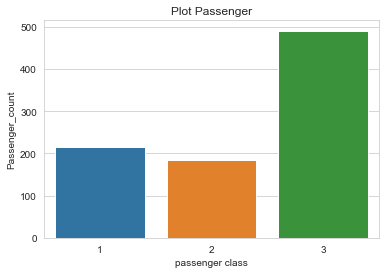

In [564]:
sns.set_style("whitegrid") 
sns.countplot(x="Pclass",data=train_data)
plt.xlabel('passenger class')
plt.ylabel('Passenger_count')
plt.title('Plot Passenger')
plt.show()

#   Relationship between passenger classes (survived or not-survived).

In [565]:
train_relation_survived_pclass= train_data.groupby(['Survived','Pclass']).size().reset_index(name='count')
train_relation_survived_pclass

,Survived,Pclass,count
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


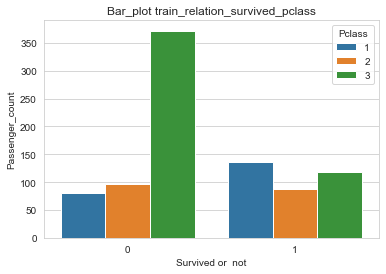

In [566]:
sns.barplot(data=train_relation_survived_pclass,x='Survived',y='count',hue='Pclass')
plt.xlabel('Survived or  not')
plt.ylabel('Passenger_count')
plt.title('Bar_plot train_relation_survived_pclass')
plt.show()

# Gender(Sex) Survived / Not Survived

.Count the male and female in titanic.

In [567]:
train_count_Sex = train_data.Sex.value_counts().reset_index()
train_count_Sex 


,index,Sex
0,1,577
1,0,314


# Graph show number of male and female in Titanic.

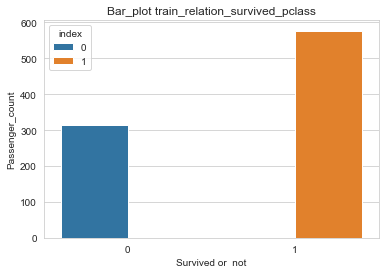

In [568]:
sns.barplot(data=train_count_Sex ,x='index',y='Sex',hue='index')
plt.xlabel('Survived or  not')
plt.ylabel('Passenger_count')
plt.title('Bar_plot train_relation_survived_pclass')
plt.show()

#  Relationship between Gender and Survival.

In [569]:
train_relation_survived_Sex= train_data.groupby(['Survived','Sex']).size().reset_index(name='count')
train_relation_survived_Sex

,Survived,Sex,count
0,0,0,81
1,0,1,468
2,1,0,233
3,1,1,109


<Figure size 720x432 with 0 Axes>

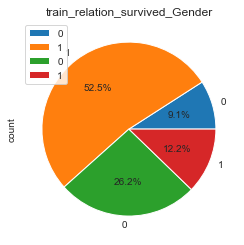

In [570]:
plt.figure(figsize=(10, 6))
train_relation_survived_Sex.plot.pie(y='count',labels=train_relation_survived_Sex['Sex'],autopct='%.1f%%')
plt.title('train_relation_survived_Gender')
plt.show()

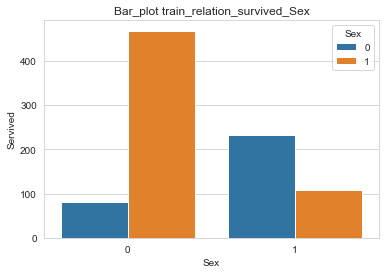

In [571]:
sns.barplot(data=train_relation_survived_Sex,x='Survived',y='count',hue='Sex')
plt.xlabel('Sex')
plt.ylabel('Servived')
plt.title('Bar_plot train_relation_survived_Sex')
plt.show()

# Parch Column

This variable represents the number of parents or children the passenger had aboard the Titanic.

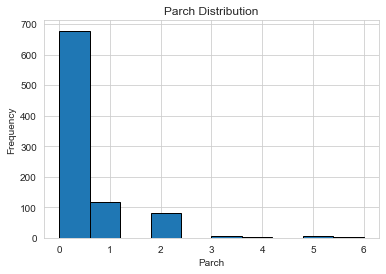

In [572]:
plt.hist(train_data["Parch"], bins=10, edgecolor='black')
plt.xlabel("Parch")
plt.ylabel("Frequency")
plt.title("Parch Distribution")
plt.show()


In [573]:
train_count_Parch = train_data.Parch.value_counts().reset_index()
train_count_Parch

,index,Parch
0,0,678
1,1,118
2,2,80
3,5,5
4,3,5
5,4,4
6,6,1


# SibSp

This variable represents the number of siblings or spouses the passenger had aboard the Titanic. 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

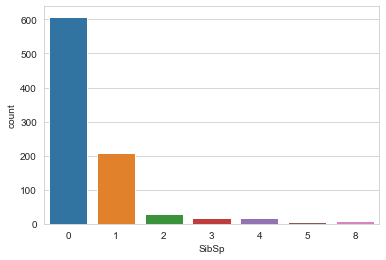

In [574]:
sns.set_style("whitegrid")
sns.countplot(x="SibSp",data=train_data)

In [575]:
train_count_Sibsp = train_data.SibSp.value_counts().reset_index()
train_count_Sibsp 

,index,SibSp
0,0,608
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


# Relation between Parch and Sibsp

In [576]:
train_relation_sibSp_Parch= train_data.groupby(['Parch','SibSp']).size().reset_index(name='count')
train_relation_sibSp_Parch

,Parch,SibSp,count
0,0,0,537
1,0,1,123
2,0,2,16
3,0,3,2
4,1,0,38
5,1,1,57
6,1,2,7
7,1,3,7
8,1,4,9
9,2,0,29


.If a passenger had a non-zero value for "Parch" but a value of zero for "SibSp," it suggests they were traveling with parents or children but not with siblings or a spouse.

.If a passenger had a non-zero value for "SibSp" but a value of zero for "Parch," it suggests they were traveling with siblings or a spouse but not with parents or children.

.If a passenger had non-zero values for both "Parch" and "SibSp," it suggests they were traveling with both parents/children and siblings/spouse, indicating a larger family group.

.If both "Parch" and "SibSp" are zero, it suggests the passenger was traveling alone, without any immediate family members or a spouse.

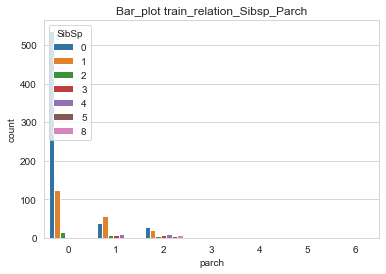

In [577]:
sns.barplot(data=train_relation_sibSp_Parch,x='Parch',y='count',hue='SibSp')
plt.xlabel('parch')
plt.ylabel('count')
plt.title('Bar_plot train_relation_Sibsp_Parch')
plt.show()

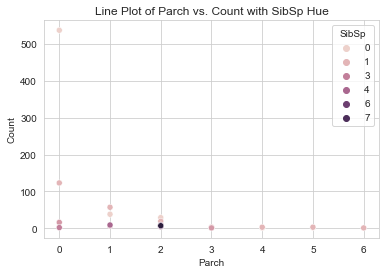

In [578]:
sns.scatterplot(data=train_relation_sibSp_Parch, x='Parch', y='count', hue='SibSp')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Line Plot of Parch vs. Count with SibSp Hue')
plt.show()


In [579]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


# Remove Unnecessary Column

.We can remove the Passenger_id,Pclass as they donot contribute to target class.

In [580]:
train_data.drop(['PassengerId','Pclass'],axis=1,inplace=True)

In [581]:
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,0,1,35.0,0,0,8.0500,0,0,1


# Classification Algorithm for Titanic.

In [582]:
x=train_data.drop("Survived",axis=1)
y=train_data["Survived"]
y=pd.DataFrame({'Survived':y.values})

x.shape
y.shape

(891, 1)

In [583]:
X_test=test_data  

# Standardization Data

In [584]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x)
X_test_scaled = scaler.transform(X_test)


# Train_Test Split

In [585]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train_scaled,y,test_size=0.2,random_state=4)

In [586]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, Y_train.values.ravel())

# Make predictions on the test data
y_pred = model.predict(X_test)
print(y_pred)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ",accuracy)

[0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0]
Accuracy:  0.8212290502793296


I apply a couple of algorithm but i found this algorithm to give me coorect prediction and good Accuracythen other algorithm like SVM.